In [21]:
import os
import datetime
import json

from sttre.sttre import train_val

import sys

print(sys.argv[1:]

filename = 'exp_1_1.json'
with open(f'./settings/{filename}', 'r') as f:
    settings = json.load(f)

regression_head = settings['regression_head']
data_setting = settings['data_setting']
params = settings['params']

period = {'train': [datetime.datetime(2020, 10, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 5, 1), datetime.datetime(2022, 7, 31)]}

path_preprocessed = './../_ynyt/data/preprocessed'
horizon = 6

model = train_val(period=period, path_preprocessed=path_preprocessed,
                  regression_head=regression_head, data_setting=data_setting, 
                  verbose=True, horizon=horizon, **params)

cpu!
epoch: 0, train loss: 1.517988, val loss: 0.144604, val mae: 0.295849, val r2: -2.670630


KeyboardInterrupt: 

In [23]:
%%writefile train.py
import os
import sys

import datetime
import json

from sttre.sttre import train_val


filename = sys.argv[0]
with open(f'./settings/{filename}', 'r') as f:
    settings = json.load(f)

regression_head = settings['regression_head']
data_setting = settings['data_setting']
params = settings['params']

period = {'train': [datetime.datetime(2020, 10, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 5, 1), datetime.datetime(2022, 7, 31)]}

path_preprocessed = './../data/preprocessed'
horizon = 6

model = train_val(period=period, path_preprocessed=path_preprocessed,
                  regression_head=regression_head, data_setting=data_setting, 
                  verbose=True, horizon=horizon, **params)

Writing train.py


In [412]:
import json

settings = {}
settings['regression_head'] = {'heads': 1, 
                               'dropout_head': 0.1, 
                               'layers': [6], 
                               'add_features': 2,    
                               'flatt_factor': 2} 

settings['data_setting'] = {'features': True, 'D': True, 'hours': True, 'weekday': True}

settings['params'] = {'embed_size': 16,
                      'heads': 4,
                      'num_layers': 1,
                      'dropout': 0.1, 
                      'forward_expansion': 1, 
                      'lr': 0.000005, 
                      'batch_size': 128, 
                      'seq_len': 4, 
                      'epoches': 600,
                      'device': 'cuda',
                     }

filename = 'exp_final.json'

with open(f'./settings/{filename}', 'w') as f:
    json.dump(settings, f)

In [37]:
!cat ./settings/exp_1_5_ok1.json

{"regression_head": {"heads": 1, "dropout_head": 0.1, "layers": [6], "add_features": 2, "flatt_factor": 2}, "data_setting": {"features": true, "D": true, "hours": true, "weekday": true}, "params": {"embed_size": 32, "heads": 4, "num_layers": 2, "dropout": 0.15, "forward_expansion": 1, "lr": 1e-05, "batch_size": 128, "seq_len": 6, "epoches": 300, "device": "cpu"}}

In [32]:
!cat ./settings/exp_1_6_up_500.json

{"regression_head": {"heads": 1, "dropout_head": 0.1, "layers": [16, 6], "add_features": 2, "flatt_factor": 2}, "data_setting": {"features": true, "D": true, "hours": true, "weekday": true}, "params": {"embed_size": 32, "heads": 4, "num_layers": 2, "dropout": 0.15, "forward_expansion": 1, "lr": 1e-05, "batch_size": 128, "seq_len": 6, "epoches": 300, "device": "cpu"}}

In [30]:
!ls ./settings

exp_1_1.json        exp_1_4.json        exp_1_6.json
exp_1_2.json        exp_1_5.json        exp_1_6_up_500.json
exp_1_3.json        exp_1_5_ok1.json    exp_1_7.json


In [ ]:
                       0.04457, r2: test: 0.90793, 0.96273, train: 0.91653, 0.96253
t=2, mse: 0.0047, mae: 0.04805, r2: test: 0.89385, 0.95456, train: 0.90326, 0.95393
t=3, mse: 0.00506, mae: 0.04958, r2: test: 0.88563, 0.95046, train: 0.89692, 0.94974
t=4, mse: 0.00524, mae: 0.05035, r2: test: 0.8815, 0.94829, train: 0.89251, 0.94658
t=5, mse: 0.0053, mae: 0.0509, r2: test: 0.88013, 0.947, train: 0.88920, 0.94407
t=6, mse: 0.00535, mae: 0.05129, r2: test: 0.87887, 0.94622, train: 0.88689, 0.94230

In [22]:
(0.04457 + 0.04805 + 0.04958 + 0.05035 + 0.0509 + 0.05129) / 6

0.04912333333333333

In [23]:
(0.90793 + 0.89385 + 0.88563 + 0.8815 + 0.88013 + 0.87887) / 6

0.887985

In [ ]:
import os
import sys

import datetime
import json

from sttre.sttre import train_val

settings = {}
settings['regression_head'] = {'heads': 1, 
                               'dropout_head': 0.1, 
                               'layers': [8], 
                               'add_features': 2,    
                               'flatt_factor': 2} 

settings['data_setting'] = {'features': True, 'D': True, 'hours': True, 'weekday': True}

settings['params'] = {'embed_size': 24,
                      'heads': 4,
                      'num_layers': 2,
                      'dropout': 0.1, 
                      'forward_expansion': 1, 
                      'lr': 0.00001, 
                      'batch_size': 128, 
                      'seq_len': 6, 
                      'epoches': 500,
                      'device': 'cpu',
                     }

regression_head = settings['regression_head']
data_setting = settings['data_setting']
params = settings['params']

period = {'train': [datetime.datetime(2020, 10, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 5, 1), datetime.datetime(2022, 7, 31)]}

#path_preprocessed = './../data/preprocessed'
path_preprocessed = './../_ynyt/data/preprocessed'
horizon = 6

model = train_val(period=period, path_preprocessed=path_preprocessed,
                  regression_head=regression_head, data_setting=data_setting, 
                  verbose=True, horizon=horizon, **params)


In [43]:
import json

settings = {}
settings['regression_head'] = {'heads': 1, 
                               'dropout_head': 0.15, 
                               'layers': [8], 
                               'add_features': 2,    
                               'flatt_factor': 2} 

settings['data_setting'] = {'features': True, 'D': True, 'hours': True, 'weekday': True}

settings['params'] = {'embed_size': 32,
                      'heads': 4,
                      'num_layers': 2,
                      'dropout': 0.2, 
                      'forward_expansion': 1, 
                      'lr': 0.00001, 
                      'batch_size': 128, 
                      'seq_len': 6, 
                      'epoches': 500,
                      'device': 'cpu',
                     }

import os
import sys

import datetime
import json

from sttre.sttre import train_val


regression_head = settings['regression_head']
data_setting = settings['data_setting']
params = settings['params']

period = {'train': [datetime.datetime(2020, 10, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 5, 1), datetime.datetime(2022, 7, 31)]}

#path_preprocessed = './../data/preprocessed'
path_preprocessed = './../_ynyt/data/preprocessed'
horizon = 6

model = train_val(period=period, path_preprocessed=path_preprocessed,
                  regression_head=regression_head, data_setting=data_setting, 
                  verbose=True, horizon=horizon, **params)


mps!
Transformer(
  (element_embedding_temporal): Linear(in_features=294, out_features=192, bias=True)
  (element_embedding_spatial): Linear(in_features=2695, out_features=1760, bias=True)
  (pos_embedding): Embedding(6, 32)
  (variable_embedding): Embedding(55, 32)
  (temporal): Encoder(
    (fc_out): Linear(in_features=32, out_features=32, bias=True)
    (layers): ModuleList(
      (0-1): 2 x EncoderBlock(
        (attention): SelfAttention(
          (values): Linear(in_features=32, out_features=32, bias=True)
          (keys): Linear(in_features=32, out_features=32, bias=True)
          (queries): Linear(in_features=32, out_features=32, bias=True)
          (fc_out): Linear(in_features=32, out_features=32, bias=True)
        )
        (norm1): BatchNorm1d(330, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (norm2): BatchNorm1d(330, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (feed_forward): Sequential(
          (0): Linear(in_fe

epoch: 55, train loss: 0.003408, val loss: 0.006016, val mae: 0.054342, val r2: 0.849457
epoch: 56, train loss: 0.003397, val loss: 0.006022, val mae: 0.054361, val r2: 0.849328
epoch: 57, train loss: 0.003379, val loss: 0.006006, val mae: 0.054237, val r2: 0.849795
epoch: 58, train loss: 0.003367, val loss: 0.005976, val mae: 0.054117, val r2: 0.850523
epoch: 59, train loss: 0.003367, val loss: 0.005996, val mae: 0.054095, val r2: 0.850044
epoch: 60, train loss: 0.003362, val loss: 0.005982, val mae: 0.053954, val r2: 0.850298
epoch: 61, train loss: 0.003366, val loss: 0.005994, val mae: 0.054038, val r2: 0.850014
epoch: 62, train loss: 0.003381, val loss: 0.006000, val mae: 0.054014, val r2: 0.849941
epoch: 63, train loss: 0.003404, val loss: 0.006003, val mae: 0.054098, val r2: 0.849908
epoch: 64, train loss: 0.003440, val loss: 0.006080, val mae: 0.054499, val r2: 0.848209
epoch: 65, train loss: 0.003476, val loss: 0.006328, val mae: 0.055898, val r2: 0.842384
epoch: 66, train loss

epoch: 147, train loss: 0.002563, val loss: 0.005547, val mae: 0.052327, val r2: 0.860789
epoch: 148, train loss: 0.002551, val loss: 0.005563, val mae: 0.052421, val r2: 0.860374
epoch: 149, train loss: 0.002540, val loss: 0.005523, val mae: 0.052238, val r2: 0.861382
epoch: 150, train loss: 0.002531, val loss: 0.005598, val mae: 0.052572, val r2: 0.859605
epoch: 151, train loss: 0.002519, val loss: 0.005621, val mae: 0.052709, val r2: 0.859124
epoch: 152, train loss: 0.002505, val loss: 0.005628, val mae: 0.052679, val r2: 0.858950
epoch: 153, train loss: 0.002498, val loss: 0.005579, val mae: 0.052523, val r2: 0.860114
epoch: 154, train loss: 0.002490, val loss: 0.005498, val mae: 0.052063, val r2: 0.862167
epoch: 155, train loss: 0.002482, val loss: 0.005595, val mae: 0.052603, val r2: 0.859706
epoch: 156, train loss: 0.002472, val loss: 0.005536, val mae: 0.052328, val r2: 0.861137
epoch: 157, train loss: 0.002464, val loss: 0.005709, val mae: 0.053185, val r2: 0.856997
epoch: 158

epoch: 239, train loss: 0.002157, val loss: 0.005418, val mae: 0.051776, val r2: 0.863338
epoch: 240, train loss: 0.002149, val loss: 0.005376, val mae: 0.051552, val r2: 0.864610
epoch: 241, train loss: 0.002136, val loss: 0.005246, val mae: 0.050845, val r2: 0.868063
epoch: 242, train loss: 0.002130, val loss: 0.005196, val mae: 0.050482, val r2: 0.869352
epoch: 243, train loss: 0.002117, val loss: 0.005161, val mae: 0.050211, val r2: 0.870366
epoch: 244, train loss: 0.002110, val loss: 0.005126, val mae: 0.049924, val r2: 0.871359
epoch: 245, train loss: 0.002099, val loss: 0.005094, val mae: 0.049711, val r2: 0.872156
epoch: 246, train loss: 0.002095, val loss: 0.005101, val mae: 0.049723, val r2: 0.872081
epoch: 247, train loss: 0.002090, val loss: 0.005111, val mae: 0.049718, val r2: 0.871782
epoch: 248, train loss: 0.002083, val loss: 0.005095, val mae: 0.049629, val r2: 0.872216
epoch: 249, train loss: 0.002078, val loss: 0.005074, val mae: 0.049531, val r2: 0.872708
epoch: 250

epoch: 331, train loss: 0.001917, val loss: 0.006591, val mae: 0.056979, val r2: 0.831900
epoch: 332, train loss: 0.001920, val loss: 0.006805, val mae: 0.058077, val r2: 0.826167
epoch: 333, train loss: 0.001924, val loss: 0.006814, val mae: 0.058283, val r2: 0.825549
epoch: 334, train loss: 0.001932, val loss: 0.006701, val mae: 0.057798, val r2: 0.828537
epoch: 335, train loss: 0.001926, val loss: 0.006478, val mae: 0.056881, val r2: 0.834534
epoch: 336, train loss: 0.001927, val loss: 0.006073, val mae: 0.054870, val r2: 0.845226
epoch: 337, train loss: 0.001912, val loss: 0.005834, val mae: 0.053737, val r2: 0.851890
epoch: 338, train loss: 0.001898, val loss: 0.005570, val mae: 0.052188, val r2: 0.858968
epoch: 339, train loss: 0.001889, val loss: 0.005455, val mae: 0.051508, val r2: 0.862068
epoch: 340, train loss: 0.001893, val loss: 0.005420, val mae: 0.051222, val r2: 0.863273
epoch: 341, train loss: 0.001898, val loss: 0.005481, val mae: 0.051573, val r2: 0.861859
epoch: 342

epoch: 423, train loss: 0.001653, val loss: 0.005377, val mae: 0.051200, val r2: 0.864495
epoch: 424, train loss: 0.001644, val loss: 0.005557, val mae: 0.052327, val r2: 0.859717
epoch: 425, train loss: 0.001641, val loss: 0.005746, val mae: 0.053458, val r2: 0.854621
epoch: 426, train loss: 0.001636, val loss: 0.005813, val mae: 0.053921, val r2: 0.852760
epoch: 427, train loss: 0.001640, val loss: 0.005793, val mae: 0.053729, val r2: 0.853241
epoch: 428, train loss: 0.001640, val loss: 0.005706, val mae: 0.053332, val r2: 0.855486
epoch: 429, train loss: 0.001644, val loss: 0.005589, val mae: 0.052580, val r2: 0.858631
epoch: 430, train loss: 0.001648, val loss: 0.005503, val mae: 0.051908, val r2: 0.860909
epoch: 431, train loss: 0.001642, val loss: 0.005427, val mae: 0.051421, val r2: 0.862923
epoch: 432, train loss: 0.001637, val loss: 0.005414, val mae: 0.051345, val r2: 0.863352
epoch: 433, train loss: 0.001637, val loss: 0.005364, val mae: 0.050994, val r2: 0.864679
epoch: 434

In [50]:
import json

settings = {}
settings['regression_head'] = {'heads': 1, 
                               'dropout_head': 0.1, 
                               'layers': [8], 
                               'add_features': 2,    
                               'flatt_factor': 2} 

settings['data_setting'] = {'features': True, 'D': True, 'hours': True, 'weekday': True}

settings['params'] = {'embed_size': 32,
                      'heads': 4,
                      'num_layers': 2,
                      'dropout': 0.1, 
                      'forward_expansion': 1, 
                      'lr': 0.00001, 
                      'batch_size': 128, 
                      'seq_len': 6, 
                      'epoches': 350,
                      'device': 'cpu',
                     }

import os
import sys

import datetime
import json

from sttre.sttre import train_val


regression_head = settings['regression_head']
data_setting = settings['data_setting']
params = settings['params']

period = {'train': [datetime.datetime(2020, 10, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 5, 1), datetime.datetime(2022, 7, 31)]}

#path_preprocessed = './../data/preprocessed'
path_preprocessed = './../_ynyt/data/preprocessed'
horizon = 6

model = train_val(period=period, path_preprocessed=path_preprocessed,
                  regression_head=regression_head, data_setting=data_setting, 
                  verbose=True, horizon=horizon, **params)


mps!
Transformer(
  (element_embedding_temporal): Linear(in_features=294, out_features=192, bias=True)
  (element_embedding_spatial): Linear(in_features=2695, out_features=1760, bias=True)
  (pos_embedding): Embedding(6, 32)
  (variable_embedding): Embedding(55, 32)
  (temporal): Encoder(
    (fc_out): Linear(in_features=32, out_features=32, bias=True)
    (layers): ModuleList(
      (0-1): 2 x EncoderBlock(
        (attention): SelfAttention(
          (values): Linear(in_features=32, out_features=32, bias=True)
          (keys): Linear(in_features=32, out_features=32, bias=True)
          (queries): Linear(in_features=32, out_features=32, bias=True)
          (fc_out): Linear(in_features=32, out_features=32, bias=True)
        )
        (norm1): BatchNorm1d(330, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (norm2): BatchNorm1d(330, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (feed_forward): Sequential(
          (0): Linear(in_fe

epoch: 55, train loss: 0.003336, val loss: 0.006024, val mae: 0.054462, val r2: 0.849891
epoch: 56, train loss: 0.003270, val loss: 0.006012, val mae: 0.054412, val r2: 0.850198
epoch: 57, train loss: 0.003229, val loss: 0.005988, val mae: 0.054287, val r2: 0.850940
epoch: 58, train loss: 0.003210, val loss: 0.006049, val mae: 0.054672, val r2: 0.849517
epoch: 59, train loss: 0.003212, val loss: 0.006000, val mae: 0.054475, val r2: 0.850741
epoch: 60, train loss: 0.003234, val loss: 0.006004, val mae: 0.054554, val r2: 0.850686
epoch: 61, train loss: 0.003251, val loss: 0.005935, val mae: 0.054205, val r2: 0.852278
epoch: 62, train loss: 0.003279, val loss: 0.005838, val mae: 0.053679, val r2: 0.854509
epoch: 63, train loss: 0.003313, val loss: 0.005694, val mae: 0.052769, val r2: 0.857908
epoch: 64, train loss: 0.003330, val loss: 0.005629, val mae: 0.052305, val r2: 0.859224
epoch: 65, train loss: 0.003344, val loss: 0.005657, val mae: 0.052223, val r2: 0.858181
epoch: 66, train loss

epoch: 147, train loss: 0.002398, val loss: 0.005262, val mae: 0.050812, val r2: 0.867769
epoch: 148, train loss: 0.002393, val loss: 0.005343, val mae: 0.051247, val r2: 0.865662
epoch: 149, train loss: 0.002391, val loss: 0.005439, val mae: 0.051876, val r2: 0.863046
epoch: 150, train loss: 0.002393, val loss: 0.005474, val mae: 0.052048, val r2: 0.862061
epoch: 151, train loss: 0.002396, val loss: 0.005516, val mae: 0.052228, val r2: 0.860785
epoch: 152, train loss: 0.002396, val loss: 0.005678, val mae: 0.053181, val r2: 0.856388
epoch: 153, train loss: 0.002395, val loss: 0.005697, val mae: 0.053226, val r2: 0.855836
epoch: 154, train loss: 0.002405, val loss: 0.005864, val mae: 0.054150, val r2: 0.851194
epoch: 155, train loss: 0.002418, val loss: 0.005931, val mae: 0.054472, val r2: 0.849187
epoch: 156, train loss: 0.002438, val loss: 0.005995, val mae: 0.054729, val r2: 0.847423
epoch: 157, train loss: 0.002458, val loss: 0.006305, val mae: 0.056372, val r2: 0.838923
epoch: 158

epoch: 239, train loss: 0.002004, val loss: 0.005234, val mae: 0.050269, val r2: 0.868639
epoch: 240, train loss: 0.001968, val loss: 0.005287, val mae: 0.050736, val r2: 0.867191
epoch: 241, train loss: 0.001937, val loss: 0.005343, val mae: 0.051121, val r2: 0.865735
epoch: 242, train loss: 0.001933, val loss: 0.005416, val mae: 0.051577, val r2: 0.863677
epoch: 243, train loss: 0.001930, val loss: 0.005396, val mae: 0.051552, val r2: 0.864001
epoch: 244, train loss: 0.001926, val loss: 0.005343, val mae: 0.051187, val r2: 0.865363
epoch: 245, train loss: 0.001915, val loss: 0.005320, val mae: 0.051041, val r2: 0.865891
epoch: 246, train loss: 0.001906, val loss: 0.005315, val mae: 0.050978, val r2: 0.865995
epoch: 247, train loss: 0.001908, val loss: 0.005362, val mae: 0.051121, val r2: 0.864721
epoch: 248, train loss: 0.001913, val loss: 0.005424, val mae: 0.051469, val r2: 0.863115
epoch: 249, train loss: 0.001911, val loss: 0.005435, val mae: 0.051641, val r2: 0.862915
epoch: 250

epoch: 331, train loss: 0.001643, val loss: 0.005741, val mae: 0.053123, val r2: 0.855561
epoch: 332, train loss: 0.001641, val loss: 0.005835, val mae: 0.053581, val r2: 0.853361
epoch: 333, train loss: 0.001641, val loss: 0.005839, val mae: 0.053565, val r2: 0.853365
epoch: 334, train loss: 0.001643, val loss: 0.005839, val mae: 0.053498, val r2: 0.853661
epoch: 335, train loss: 0.001644, val loss: 0.005865, val mae: 0.053499, val r2: 0.853113
epoch: 336, train loss: 0.001651, val loss: 0.005871, val mae: 0.053439, val r2: 0.852823
epoch: 337, train loss: 0.001652, val loss: 0.005756, val mae: 0.052737, val r2: 0.855632
epoch: 338, train loss: 0.001661, val loss: 0.005750, val mae: 0.052545, val r2: 0.855603
epoch: 339, train loss: 0.001679, val loss: 0.005872, val mae: 0.053152, val r2: 0.852445
epoch: 340, train loss: 0.001696, val loss: 0.006116, val mae: 0.054454, val r2: 0.846251
epoch: 341, train loss: 0.001696, val loss: 0.006470, val mae: 0.056064, val r2: 0.837531
epoch: 342

In [48]:
# *
import json

settings = {}
settings['regression_head'] = {'heads': 1, 
                               'dropout_head': 0.1, 
                               'layers': [8], 
                               'add_features': 2,    
                               'flatt_factor': 2} 

settings['data_setting'] = {'features': True, 'D': True, 'hours': True, 'weekday': True}

settings['params'] = {'embed_size': 32,
                      'heads': 4,
                      'num_layers': 1,
                      'dropout': 0.1, 
                      'forward_expansion': 1, 
                      'lr': 0.00001, 
                      'batch_size': 128, 
                      'seq_len': 6, 
                      'epoches': 350,
                      'device': 'cpu',
                     }

import os
import sys

import datetime
import json

from sttre.sttre import train_val


regression_head = settings['regression_head']
data_setting = settings['data_setting']
params = settings['params']

period = {'train': [datetime.datetime(2020, 10, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 5, 1), datetime.datetime(2022, 7, 31)]}

#path_preprocessed = './../data/preprocessed'
path_preprocessed = './../_ynyt/data/preprocessed'
horizon = 6

model = train_val(period=period, path_preprocessed=path_preprocessed,
                  regression_head=regression_head, data_setting=data_setting, 
                  verbose=True, horizon=horizon, **params)


mps!
Transformer(
  (element_embedding_temporal): Linear(in_features=294, out_features=192, bias=True)
  (element_embedding_spatial): Linear(in_features=2695, out_features=1760, bias=True)
  (pos_embedding): Embedding(6, 32)
  (variable_embedding): Embedding(55, 32)
  (temporal): Encoder(
    (fc_out): Linear(in_features=32, out_features=32, bias=True)
    (layers): ModuleList(
      (0): EncoderBlock(
        (attention): SelfAttention(
          (values): Linear(in_features=32, out_features=32, bias=True)
          (keys): Linear(in_features=32, out_features=32, bias=True)
          (queries): Linear(in_features=32, out_features=32, bias=True)
          (fc_out): Linear(in_features=32, out_features=32, bias=True)
        )
        (norm1): BatchNorm1d(330, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (norm2): BatchNorm1d(330, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (feed_forward): Sequential(
          (0): Linear(in_features

epoch: 55, train loss: 0.003293, val loss: 0.006098, val mae: 0.054631, val r2: 0.847991
epoch: 56, train loss: 0.003239, val loss: 0.006116, val mae: 0.054744, val r2: 0.847680
epoch: 57, train loss: 0.003217, val loss: 0.006075, val mae: 0.054557, val r2: 0.848700
epoch: 58, train loss: 0.003224, val loss: 0.006085, val mae: 0.054615, val r2: 0.848516
epoch: 59, train loss: 0.003254, val loss: 0.006062, val mae: 0.054551, val r2: 0.849027
epoch: 60, train loss: 0.003292, val loss: 0.005991, val mae: 0.054198, val r2: 0.850670
epoch: 61, train loss: 0.003330, val loss: 0.005874, val mae: 0.053469, val r2: 0.853400
epoch: 62, train loss: 0.003369, val loss: 0.005768, val mae: 0.052755, val r2: 0.855716
epoch: 63, train loss: 0.003354, val loss: 0.005814, val mae: 0.052691, val r2: 0.854303
epoch: 64, train loss: 0.003302, val loss: 0.005904, val mae: 0.053040, val r2: 0.851982
epoch: 65, train loss: 0.003193, val loss: 0.005943, val mae: 0.053235, val r2: 0.850882
epoch: 66, train loss

epoch: 147, train loss: 0.002486, val loss: 0.006579, val mae: 0.057843, val r2: 0.832318
epoch: 148, train loss: 0.002499, val loss: 0.006645, val mae: 0.058165, val r2: 0.830369
epoch: 149, train loss: 0.002510, val loss: 0.006927, val mae: 0.059475, val r2: 0.823146
epoch: 150, train loss: 0.002520, val loss: 0.007175, val mae: 0.060664, val r2: 0.816349
epoch: 151, train loss: 0.002534, val loss: 0.007265, val mae: 0.061019, val r2: 0.814058
epoch: 152, train loss: 0.002534, val loss: 0.007403, val mae: 0.061569, val r2: 0.810294
epoch: 153, train loss: 0.002528, val loss: 0.007551, val mae: 0.062258, val r2: 0.806399
epoch: 154, train loss: 0.002524, val loss: 0.007560, val mae: 0.062232, val r2: 0.806229
epoch: 155, train loss: 0.002520, val loss: 0.007163, val mae: 0.060385, val r2: 0.816524
epoch: 156, train loss: 0.002512, val loss: 0.006732, val mae: 0.058456, val r2: 0.827661
epoch: 157, train loss: 0.002517, val loss: 0.006427, val mae: 0.056972, val r2: 0.835884
epoch: 158

epoch: 239, train loss: 0.001949, val loss: 0.005159, val mae: 0.049706, val r2: 0.870396
epoch: 240, train loss: 0.001936, val loss: 0.005231, val mae: 0.050312, val r2: 0.868488
epoch: 241, train loss: 0.001919, val loss: 0.005386, val mae: 0.051385, val r2: 0.864499
epoch: 242, train loss: 0.001913, val loss: 0.005508, val mae: 0.052109, val r2: 0.861113
epoch: 243, train loss: 0.001933, val loss: 0.005439, val mae: 0.051603, val r2: 0.862734
epoch: 244, train loss: 0.001944, val loss: 0.005303, val mae: 0.050830, val r2: 0.866378
epoch: 245, train loss: 0.001917, val loss: 0.005236, val mae: 0.050384, val r2: 0.868404
epoch: 246, train loss: 0.001901, val loss: 0.005164, val mae: 0.049932, val r2: 0.870205
epoch: 247, train loss: 0.001904, val loss: 0.005240, val mae: 0.050581, val r2: 0.868156
epoch: 248, train loss: 0.001894, val loss: 0.005345, val mae: 0.051180, val r2: 0.865328
epoch: 249, train loss: 0.001889, val loss: 0.005444, val mae: 0.051794, val r2: 0.862680
epoch: 250

epoch: 331, train loss: 0.001672, val loss: 0.005796, val mae: 0.052772, val r2: 0.854295
epoch: 332, train loss: 0.001659, val loss: 0.006080, val mae: 0.054240, val r2: 0.847087
epoch: 333, train loss: 0.001653, val loss: 0.006248, val mae: 0.055078, val r2: 0.842530
epoch: 334, train loss: 0.001665, val loss: 0.005938, val mae: 0.053482, val r2: 0.850135
epoch: 335, train loss: 0.001660, val loss: 0.005663, val mae: 0.052076, val r2: 0.857308
epoch: 336, train loss: 0.001670, val loss: 0.005602, val mae: 0.051792, val r2: 0.858981
epoch: 337, train loss: 0.001702, val loss: 0.005898, val mae: 0.053415, val r2: 0.851441
epoch: 338, train loss: 0.001681, val loss: 0.006229, val mae: 0.055190, val r2: 0.842935
epoch: 339, train loss: 0.001655, val loss: 0.005877, val mae: 0.053549, val r2: 0.851737
epoch: 340, train loss: 0.001671, val loss: 0.005516, val mae: 0.051582, val r2: 0.861209
epoch: 341, train loss: 0.001658, val loss: 0.005464, val mae: 0.051305, val r2: 0.862798
epoch: 342

In [76]:
# final
import json

settings = {}
settings['regression_head'] = {'heads': 1, 
                               'dropout_head': 0.1, 
                               'layers': [6], 
                               'add_features': 2,    
                               'flatt_factor': 2} 

settings['data_setting'] = {'features': True, 'D': True, 'hours': True, 'weekday': True}

settings['params'] = {'embed_size': 16,
                      'heads': 4,
                      'num_layers': 1,
                      'dropout': 0.1, 
                      'forward_expansion': 1, 
                      'lr': 0.00001, 
                      'batch_size': 128, 
                      'seq_len': 4, 
                      'epoches': 286,
                      'device': 'cpu',
                     }

import os
import sys

import datetime
import json

from sttre.sttre import train_val


regression_head = settings['regression_head']
data_setting = settings['data_setting']
params = settings['params']

period = {'train': [datetime.datetime(2020, 8, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 4, 16), datetime.datetime(2022, 7, 31)]}

#path_preprocessed = './../data/preprocessed'
path_preprocessed = './../_ynyt/data/preprocessed'
horizon = 6

model = train_val(period=period, path_preprocessed=path_preprocessed,
                  regression_head=regression_head, data_setting=data_setting, 
                  verbose=True, horizon=horizon, **params)


mps!
Transformer(
  (element_embedding_temporal): Linear(in_features=196, out_features=64, bias=True)
  (element_embedding_spatial): Linear(in_features=2695, out_features=880, bias=True)
  (pos_embedding): Embedding(4, 16)
  (variable_embedding): Embedding(55, 16)
  (temporal): Encoder(
    (fc_out): Linear(in_features=16, out_features=16, bias=True)
    (layers): ModuleList(
      (0): EncoderBlock(
        (attention): SelfAttention(
          (values): Linear(in_features=16, out_features=16, bias=True)
          (keys): Linear(in_features=16, out_features=16, bias=True)
          (queries): Linear(in_features=16, out_features=16, bias=True)
          (fc_out): Linear(in_features=16, out_features=16, bias=True)
        )
        (norm1): BatchNorm1d(220, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (norm2): BatchNorm1d(220, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (feed_forward): Sequential(
          (0): Linear(in_features=1

epoch: 55, train loss: 0.003085, val loss: 0.005700, val mae: 0.053354, val r2: 0.861271
epoch: 56, train loss: 0.003070, val loss: 0.005707, val mae: 0.053436, val r2: 0.861173
epoch: 57, train loss: 0.003053, val loss: 0.005672, val mae: 0.053217, val r2: 0.862019
epoch: 58, train loss: 0.003037, val loss: 0.005593, val mae: 0.052740, val r2: 0.863940
epoch: 59, train loss: 0.003019, val loss: 0.005609, val mae: 0.052797, val r2: 0.863562
epoch: 60, train loss: 0.003009, val loss: 0.005525, val mae: 0.052301, val r2: 0.865641
epoch: 61, train loss: 0.002992, val loss: 0.005545, val mae: 0.052378, val r2: 0.865116
epoch: 62, train loss: 0.002981, val loss: 0.005532, val mae: 0.052349, val r2: 0.865400
epoch: 63, train loss: 0.002968, val loss: 0.005513, val mae: 0.052232, val r2: 0.865905
epoch: 64, train loss: 0.002958, val loss: 0.005503, val mae: 0.052160, val r2: 0.866142
epoch: 65, train loss: 0.002945, val loss: 0.005441, val mae: 0.051786, val r2: 0.867630
epoch: 66, train loss

epoch: 147, train loss: 0.002502, val loss: 0.005184, val mae: 0.050081, val r2: 0.873149
epoch: 148, train loss: 0.002507, val loss: 0.005241, val mae: 0.050398, val r2: 0.871616
epoch: 149, train loss: 0.002504, val loss: 0.005292, val mae: 0.050714, val r2: 0.870146
epoch: 150, train loss: 0.002515, val loss: 0.005385, val mae: 0.051243, val r2: 0.867627
epoch: 151, train loss: 0.002528, val loss: 0.005530, val mae: 0.052082, val r2: 0.863903
epoch: 152, train loss: 0.002539, val loss: 0.005582, val mae: 0.052397, val r2: 0.862213
epoch: 153, train loss: 0.002562, val loss: 0.005806, val mae: 0.053566, val r2: 0.856165
epoch: 154, train loss: 0.002589, val loss: 0.006002, val mae: 0.054642, val r2: 0.851071
epoch: 155, train loss: 0.002622, val loss: 0.006328, val mae: 0.056358, val r2: 0.842279
epoch: 156, train loss: 0.002675, val loss: 0.006665, val mae: 0.058057, val r2: 0.833201
epoch: 157, train loss: 0.002739, val loss: 0.007131, val mae: 0.060263, val r2: 0.820675
epoch: 158

epoch: 239, train loss: 0.002290, val loss: 0.004889, val mae: 0.048042, val r2: 0.880596
epoch: 240, train loss: 0.002289, val loss: 0.004895, val mae: 0.048114, val r2: 0.880446
epoch: 241, train loss: 0.002286, val loss: 0.004858, val mae: 0.047953, val r2: 0.881451
epoch: 242, train loss: 0.002275, val loss: 0.004867, val mae: 0.047986, val r2: 0.881211
epoch: 243, train loss: 0.002277, val loss: 0.004887, val mae: 0.048115, val r2: 0.880698
epoch: 244, train loss: 0.002268, val loss: 0.004903, val mae: 0.048170, val r2: 0.880303
epoch: 245, train loss: 0.002259, val loss: 0.004918, val mae: 0.048277, val r2: 0.880008
epoch: 246, train loss: 0.002252, val loss: 0.004889, val mae: 0.048141, val r2: 0.880813
epoch: 247, train loss: 0.002243, val loss: 0.004845, val mae: 0.047935, val r2: 0.881920
epoch: 248, train loss: 0.002229, val loss: 0.004866, val mae: 0.048035, val r2: 0.881376
epoch: 249, train loss: 0.002214, val loss: 0.004839, val mae: 0.047903, val r2: 0.882150
epoch: 250

In [ ]:
test_data = YNYT(period['val'], seq_len=seq_len, mode='test', path_preprocessed=path_preprocessed, 
                     setting=data_setting, horizon=horizon)

In [254]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme("paper")

In [191]:
from sttre.data import YNYT
import datetime
import torch
from torch.utils.data import DataLoader

seq_len = settings['params']['seq_len']
horizon = 6

period = {'train': [datetime.datetime(2020, 8, 1), datetime.datetime(2022, 4, 30)], 
          'val': [datetime.datetime(2022, 4, 17), datetime.datetime(2022, 7, 31)]}

test_data = YNYT(period['val'], seq_len=seq_len, mode='test', path_preprocessed=path_preprocessed, 
                     setting=data_setting, horizon=horizon)

In [192]:
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=128)
res = []
fact = []
device = torch.device("mps")
with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        inputs, regressors, labels = data
        regressors = regressors.unsqueeze(-1)
        labels = torch.flatten(labels, start_dim=1).detach().cpu().numpy()
        output = model(inputs.to(device), regressors.to(device), 0).detach().cpu().numpy()
        res.append(output)
        fact.append(labels)

In [289]:
columns = ['t', 'zone_id', 'datetime'] + [f'target_{h}' for h in range(1, 7)]
df = test_data.bf.data.loc[:, columns]

columns = [f'pred_{h}' for h in range(1, 7)]
for c in columns:
    df[c] = 0

t0 = 0
shift = seq_len - 1
for i, y in enumerate(res):
    l = len(y)
    t1 = t0 + l
    index = df[(df.t >= t0 + shift ) & (df.t < t1 + shift)].index
    df.loc[index, columns] = np.concatenate(y.reshape(l, 6, 55).T, axis=1).T
    t0 = t1

In [290]:
df = df[(df.t>=3) & (df.datetime < datetime.datetime(2022, 6, 1))]

In [315]:
transf_mae = []
transf_r2 = []
for h in range(1, 7):
    mae = mean_absolute_error(df.loc[:, f'target_{h}'].values, df.loc[:, f'pred_{h}'].values)
    r2 = r2_score(df.loc[:, f'target_{h}'].values, df.loc[:, f'pred_{h}'].values)
    transf_mae.append(mae)
    transf_r2.append(r2)

In [411]:
transf_r2

[0.9045719909978178,
 0.8992152489264963,
 0.8951301902335514,
 0.8915348731480675,
 0.8876007547609097,
 0.8847107877771501]

In [316]:
ridge_mae = [0.04457, 0.04805, 0.04958, 0.05035, 0.0509, 0.05129]
ridge_r2 = [0.90793, 0.89385, 0.88563, 0.8815, 0.88013, 0.87887]

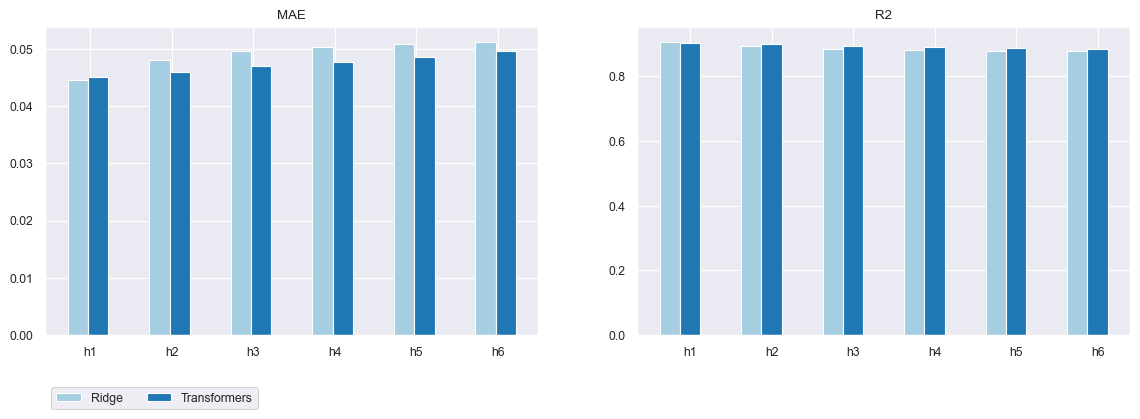

In [364]:
sns.set_palette("Paired")
x = np.arange(1, 7)
horizon = [f'h{h}' for h in x]
width = 0.25
multiplier = 0

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

for values, label in zip([ridge_mae, transf_mae], ['Ridge', 'Transformers']):
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=label)
    multiplier += 1
ax[0].legend(loc='upper left', ncols=2, bbox_to_anchor=(0, -0.15))
ax[0].set_title('MAE')
ax[0].set_xticks(x + width - 0.1, horizon)

width = 0.25
multiplier = 0
for values, label in zip([ridge_r2, transf_r2], ['Ridge', 'Transformers']):
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, label=label)
    multiplier += 1
ax[1].set_title('R2')
ax[1].set_xticks(x + width, horizon)

In [304]:
zone_id = []
mae = []
for g in df.groupby('zone_id'):
    zone_id.append(g[0])
    mae.append(mean_absolute_error(g[1].iloc[:, -12:-6].unstack().values, g[1].iloc[:, -6:].unstack().values))

mae = pd.Series(mae, index=zone_id)

<BarContainer object of 55 artists>

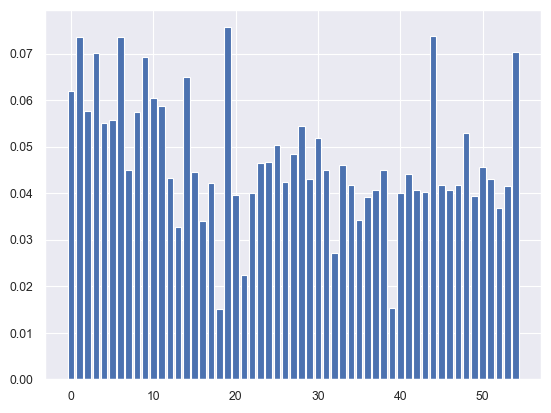

In [312]:
plt.bar(range(55), mae[zones])

In [238]:
!ls ../../_ynyt/data/results

results_month 17.49.52.csv


In [241]:
df_ridge = pd.read_csv('../../_ynyt/data/results/results_month 17.49.52.csv')

In [242]:
df_ridge

,t,datetime,zone_id,h,pred,fact
0,29184,1651363200000,13,1,4.133311,4
1,29185,1651366800000,13,1,3.035502,0
2,29186,1651370400000,13,1,2.263616,1
3,29187,1651374000000,13,1,4.082356,2
4,29188,1651377600000,13,1,3.665957,0
...,...,...,...,...,...,...
243535,29917,1654002000000,264,6,55.932773,66
243536,29918,1654005600000,264,6,56.023477,83
243537,29919,1654009200000,264,6,61.934255,84
243538,29920,1654012800000,264,6,69.127348,73


In [245]:
zones = df_ridge.groupby('zone_id').fact.mean().sort_values().index

In [403]:
from typing import Dict, Tuple, List
import os
import sys
import requests
import datetime
import mlflow

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

sys.path.append("..")
from ynyt.features import BaseFeatures, FeatureCombiner

with open("../../_ynyt/prediction/config.env") as f:
    for line in f.readlines():
        if len(line) > 2:
            k, v = line.split('=')
            os.environ[k] = v[:-1]
            
AWS_ACCESS_KEY_ID = os.environ["AWS_ACCESS_KEY_ID"]
AWS_SECRET_ACCESS_KEY = os.environ["AWS_SECRET_ACCESS_KEY"]
S3_ENDPOINT_URL = os.environ["MLFLOW_S3_ENDPOINT_URL"]
MLFLOW_TRACKING_URI = os.environ["MLFLOW_TRACKING_URI"]
ARTIFACT_URI = os.environ["ARTIFACT_URI"]

MLFLOW_TRACKING_URI, S3_ENDPOINT_URL

('http://158.160.109.15:5001', 'http://158.160.109.15:9000')

In [405]:
def update_predictions(period: str, mode: str, model_paths: dict) -> pd.DataFrame:
    path_preprocessed = './../_ynyt/data/preprocessed'
    inference_base_features = BaseFeatures(period, 
                                           config, 
                                           path_preprocessed, s3=False).fit(mode=mode)

    def back_normalization(y, bf=inference_base_features):
        return bf.target_normalizer.transform_back(bf.data, y)

    fc_inference = FeatureCombiner(config, inference_base_features).fit()

    df_output = []
    for horizon in range(1, 7):
        model = mlflow.sklearn.load_model(model_paths[horizon])
        X, y = fc_inference.transform(horizon=horizon, mode=mode)
        y_pred = model.predict(X)
        df = inference_base_features.data.loc[:, ['t', 'datetime', 'zone_id']]
        df['h'] = horizon
        df['pred'] = y_pred
        df['fact'] = y
        df_output.append(df)
    df_output = pd.concat(df_output)
    print(f'{datetime.datetime.now()}: predictions are updated, {period}')
    return df_output

# mlflow client
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
client = mlflow.tracking.MlflowClient()

config = mlflow.artifacts.load_dict(ARTIFACT_URI + "/configs/features_conf.json")

model_paths = dict()
for horizon in range(1, 7):
    model_paths[horizon ] = f'models:/fourie_plus_cartesian_ar_h{horizon}/Staging'

year, month = 2022, 5
period = [datetime.datetime(year, month, 1, 1, 0) - datetime.timedelta(days=14), 
          datetime.datetime(year, month, 31, 23, 0)]
results_month = update_predictions(period, 'validation', model_paths)

2023-12-23 13:19:42.761769: predictions are updated, [datetime.datetime(2022, 4, 17, 1, 0), datetime.datetime(2022, 5, 31, 23, 0)]


In [406]:
results_month

,t,datetime,zone_id,h,pred,fact
336,29184,2022-05-01 00:00:00,13,1,0.045421,0.043956
337,29185,2022-05-01 01:00:00,13,1,0.033357,0.000000
338,29186,2022-05-01 02:00:00,13,1,0.024875,0.010989
339,29187,2022-05-01 03:00:00,13,1,0.044861,0.021978
340,29188,2022-05-01 04:00:00,13,1,0.040285,0.000000
...,...,...,...,...,...,...
59389,29917,2022-05-31 13:00:00,264,6,0.408268,0.481752
59390,29918,2022-05-31 14:00:00,264,6,0.408930,0.605839
59391,29919,2022-05-31 15:00:00,264,6,0.452075,0.613139
59392,29920,2022-05-31 16:00:00,264,6,0.504579,0.532847


<BarContainer object of 55 artists>

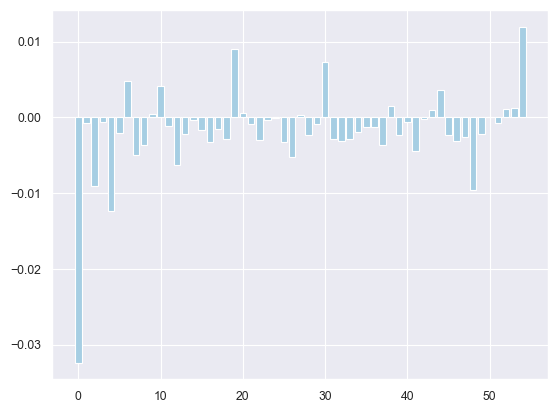

In [409]:
zone_id = []
mae_ridge = []
for g in results_month.groupby('zone_id'):
    zone_id.append(g[0])
    mae_ridge.append(mean_absolute_error(g[1].loc[:, 'fact'].values, g[1].loc[:, 'pred'].values))

mae_ridge = pd.Series(mae_ridge, index=zone_id)


zone_id = []
mae = []
for g in df.groupby('zone_id'):
    zone_id.append(g[0])
    mae.append(mean_absolute_error(g[1].iloc[:, -12:-6].unstack().values, g[1].iloc[:, -6:].unstack().values))

mae = pd.Series(mae, index=zone_id)

plt.bar(range(55), mae[zones] - mae_ridge[zones])

In [ ]:
zone_id = []
mae = []
for g in df.groupby('zone_id'):
    zone_id.append(g[0])
    mae.append(mean_absolute_error(g[1].iloc[:, -12:-6].unstack().values, g[1].iloc[:, -6:].unstack().values))

mae = pd.Series(mae, index=zone_id)